<a href="https://colab.research.google.com/github/Lingyu0829/UD_IntroProject_2022/blob/main/SkillClass1ZLY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1image**

In [ ]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np

In [ ]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

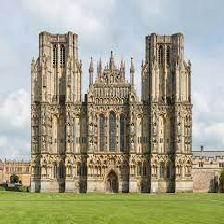

In [ ]:
gothic_image_id = os.listdir('/content/drive/MyDrive/ColabNotebooks/images/gothic')[0]
gothic_path = os.path.join('/content/drive/MyDrive/ColabNotebooks/images/gothic',gothic_image_id)
gothic_image = load_image(gothic_path)

tf.keras.preprocessing.image.load_img(gothic_path, target_size=(224,224))

In [ ]:
print(f'shape: {gothic_image.shape}')
print(f'type: {type(gothic_image)}')

shape: (1, 224, 224, 3)
type: <class 'numpy.ndarray'>


In [ ]:
model.predict(gothic_image)

1/1 [==============================] - 2s 2s/step


array([[1.44254656e-07, 1.33024534e-08, 1.42118717e-09, 1.84048901e-10,
        1.18153842e-09, 1.79093540e-08, 2.62737276e-10, 4.74010609e-09,
        2.30588412e-07, 3.29597810e-07, 6.53124800e-07, 1.20314169e-07,
        5.80450489e-07, 4.96524933e-07, 5.61221987e-06, 1.71339963e-07,
        1.94961487e-07, 1.02535950e-07, 1.01514172e-06, 1.51837401e-06,
        5.53888952e-08, 9.61354317e-07, 1.51897268e-07, 2.18729369e-07,
        1.69673440e-04, 2.97515590e-09, 1.31129143e-08, 5.13802796e-08,
        4.08891090e-08, 5.46155476e-09, 1.29409694e-09, 1.26595793e-07,
        3.45092189e-07, 4.87368101e-09, 1.67229519e-09, 7.59993490e-09,
        2.80089480e-08, 7.27569782e-09, 3.48387715e-07, 4.87808300e-08,
        9.21902981e-08, 1.72850207e-07, 2.72644115e-07, 1.28589509e-05,
        3.79588201e-08, 6.34394326e-07, 1.42019347e-08, 1.22888991e-06,
        1.45361172e-08, 3.13523344e-07, 2.53337227e-08, 3.05252144e-08,
        4.38528005e-08, 1.11744098e-08, 5.94232716e-08, 2.880189

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg')

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
model.predict(gothic_image).shape

1/1 [==============================] - 1s 878ms/step


(1, 1024)

In [ ]:
x = Dropout(rate=0.4)(model.output)
# This determines the number of outputs, and thus the number of categories, in my test case 2: dog or cat
x = Dense(4)(x)
x = Softmax()(x)
model= Model(model.inputs, x)

In [ ]:
for layer in model.layers[:-3]:
    layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    '/content/drive/MyDrive/ColabNotebooks/images', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    '/content/drive/MyDrive/ColabNotebooks/images',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
)

Found 832 images belonging to 4 classes.
Found 91 images belonging to 4 classes.


In [ ]:
batch_size = 32

history = model.fit(
  x=training,
  steps_per_epoch=training.samples // batch_size,
  # this needs to be much higher than 1, but for demo here we'll keep it at this
  validation_split=0.25,
  epochs=10,
  validation_data=validation,
  validation_steps=validation.samples // batch_size
)

Epoch 1/10
22/26 [========================>.....] - ETA: 26s - loss: 1.7082

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


26/26 [==============================] - 197s 7s/step - loss: 1.6177 - val_loss: 0.8958
Epoch 2/10
26/26 [==============================] - 67s 3s/step - loss: 1.0143 - val_loss: 0.6249
Epoch 3/10
26/26 [==============================] - 69s 3s/step - loss: 0.7727 - val_loss: 0.5227
Epoch 4/10
26/26 [==============================] - 66s 3s/step - loss: 0.6663 - val_loss: 0.4356
Epoch 5/10
26/26 [==============================] - 67s 3s/step - loss: 0.6137 - val_loss: 0.4182
Epoch 6/10
26/26 [==============================] - 69s 3s/step - loss: 0.5367 - val_loss: 0.4392
Epoch 7/10
26/26 [==============================] - 67s 3s/step - loss: 0.5291 - val_loss: 0.3682
Epoch 8/10
26/26 [==============================] - 67s 3s/step - loss: 0.4863 - val_loss: 0.3285
Epoch 9/10
26/26 [==============================] - 71s 3s/step - loss: 0.4291 - val_loss: 0.3361
Epoch 10/10
26/26 [==============================] - 67s 3s/step - loss: 0.4154 - val_loss: 0.3599


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


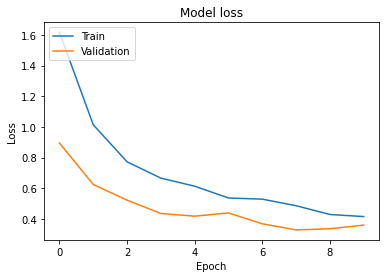

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
random_baroque = random.choice(os.listdir('/content/drive/MyDrive/ColabNotebooks/images/baroque'))
baroque_path = os.path.join('/content/drive/MyDrive/ColabNotebooks/images/baroque',random_baroque)
baroque = load_image(baroque_path)

random_gothic = random.choice(os.listdir('/content/drive/MyDrive/ColabNotebooks/images/gothic'))
gothic_path = os.path.join('/content/drive/MyDrive/ColabNotebooks/images/gothic',random_gothic)
gothic = load_image(gothic_path)

random_romanesque = random.choice(os.listdir('/content/drive/MyDrive/ColabNotebooks/images/romanesque'))
romanesque_path = os.path.join('/content/drive/MyDrive/ColabNotebooks/images/romanesque',random_romanesque)
romanesque = load_image(romanesque_path)

random_modern = random.choice(os.listdir('/content/drive/MyDrive/ColabNotebooks/images/modern'))
modern_path = os.path.join('/content/drive/MyDrive/ColabNotebooks/images/modern',random_modern)
modern = load_image(modern_path)

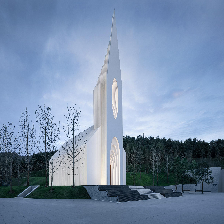

In [ ]:
tf.keras.preprocessing.image.load_img(modern_path, target_size=(224,224))

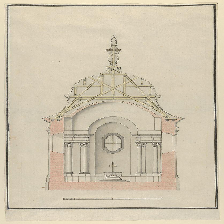

In [ ]:
tf.keras.preprocessing.image.load_img(baroque_path, target_size=(224,224))

In [ ]:
print(f'''modern:{np.round(model.predict(modern),2)}''')

1/1 [==============================] - 0s 477ms/step
modern:[[0. 0. 1. 0.]]


In [ ]:
HagiaSophia_path = '/content/drive/MyDrive/HagiaSophia/HagiaSophia.jpg'
HagiaSophia = load_image(HagiaSophia_path)

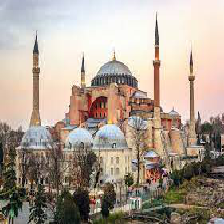

In [ ]:
tf.keras.preprocessing.image.load_img(HagiaSophia_path, target_size=(224,224))

In [ ]:
print(f'''HagiaSophia:{np.round(model.predict(HagiaSophia),2)}''')

1/1 [==============================] - 0s 63ms/step
HagiaSophia:[[0.77 0.06 0.04 0.13]]


# **2 Video**

In [ ]:
!pip install --upgrade moviepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! git clone https://github.com/kenshohara/video-classification-3d-cnn-pytorch.git

fatal: destination path 'video-classification-3d-cnn-pytorch' already exists and is not an empty directory.


In [ ]:
%cd video-classification-3d-cnn-pytorch/

/content/video-classification-3d-cnn-pytorch


In [ ]:
import json
import os
from moviepy.editor import *
from moviepy import *

# **# First write a small piece of code to load all movies on your onedrive into the input Homework: Put this into a function for easier use:**

In [ ]:
def loadmov():
  videos = os.listdir('/content/drive/MyDrive/videos')

  with open('input', 'w') as inputfile:
    for v in videos:
      if v.split('.')[-1] == 'mp4':
        inputfile.write(v+'\n')

In [ ]:
loadmov()

In [ ]:
videos = os.listdir('/content/drive/MyDrive/videos')

with open('input', 'w') as inputfile:
  for v in videos:
    if v.split('.')[-1] == 'mp4':
      inputfile.write(v+'\n')

In [ ]:
 ! python main.py --input input --video_root /content/drive/MyDrive/videos --output /content/drive/MyDrive/output.json --model /content/drive/MyDrive/resnet-34-kinetics-cpu.pth --model_depth 34 --no_cuda --mode score --resnet_shortcut A


loading model /content/drive/MyDrive/resnet-34-kinetics-cpu.pth
/content/drive/MyDrive/videos/v1.mp4
ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvp

In [ ]:
! python generate_result_video/generate_result_video.py /content/drive/MyDrive/output.json /content/drive/MyDrive/videos /content/drive/MyDrive/videos_pred class_names_list 5

/content/drive/MyDrive/videos/v1.mp4
ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable

In [ ]:
file = open('/content/drive/MyDrive/output.json')
segments = json.load(file)

In [ ]:
print(len(segments))

4


In [ ]:
segments[0].keys()

dict_keys(['video', 'clips'])

In [ ]:
segments[0]['video']

'v1.mp4'

In [ ]:
len(segments[0]['clips'])

38

In [ ]:
segments[0]['clips'][0].keys()

dict_keys(['segment', 'label', 'scores'])

In [ ]:
segments[0]['clips'][0]['segment']

[1, 16]

In [ ]:
segments[0]['clips'][0]['scores'][0]

3.9144721031188965

In [ ]:
segments[0]['clips'][0]['label']

'archery'

In [ ]:
len(segments[0]['clips'][0]['scores'])

400

In [ ]:
segments[0]['clips'][0]['scores'][0]

3.9144721031188965

In [ ]:
classNames = []
with open('class_names_list', 'r') as class_names_list:
  index = 0
  for c in class_names_list:
    classNames.append({'index':index, 'name':c, 'score':0})
    index += 1

In [ ]:
classNames[0]

{'index': 0, 'name': 'abseiling\n', 'score': 0}

In [ ]:
for i in range(len(segments[0]['clips'][0]['scores'])):
  score = segments[0]['clips'][0]['scores'][i]
  classNames[i]['score'] = score

In [ ]:
classNames.sort(key = lambda x : x['score'], reverse = True)

In [ ]:
classNames[0:5]

[{'index': 5, 'name': 'archery\n', 'score': 7.41261100769043},
 {'index': 240, 'name': 'playing paintball\n', 'score': 6.3389081954956055},
 {'index': 356, 'name': 'throwing axe\n', 'score': 5.766786098480225},
 {'index': 199, 'name': 'motorcycling\n', 'score': 5.604133605957031},
 {'index': 192, 'name': 'marching\n', 'score': 5.117986679077148}]

In [ ]:
video = VideoFileClip(r"/content/drive/MyDrive/VideosToProcess/frame-061482.mp4")
subVideo = video.subclip(0,10)
subVideo.write_videofile("/content/drive/MyDrive/VideosToProcess/frame-061482.mp4", audio_codec='aac')

chunk:  63%|██████▎   | 210/331 [19:38<00:00, 680.69it/s, now=None]

Moviepy - Building video /content/drive/MyDrive/VideosToProcess/frame-061482.mp4.
MoviePy - Writing audio in frame-061482TEMP_MPY_wvf_snd.mp4



chunk:  63%|██████▎   | 210/331 [19:39<00:00, 680.69it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/VideosToProcess/frame-061482.mp4




t:   2%|▎         | 6/240 [00:00<00:04, 58.17it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.8/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/drive/MyDrive/VideosToProcess/frame-061482.mp4, 4792320 bytes wanted but 0 bytes read,at frame 9/489, at time 0.38/20.39 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+


t:   5%|▌         | 12/240 [00:00<00:04, 50.00it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.8/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/drive/MyDrive/VideosToProcess/frame-061482.mp4, 4792320 bytes wanted but 0 bytes read,at frame 11/489, at time 0.46/20.39 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.

Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/VideosToProcess/frame-061482.mp4


In [ ]:
subVideo.ipython_display()

chunk:  63%|██████▎   | 210/331 [20:15<00:00, 680.69it/s, now=None]

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3



chunk:  63%|██████▎   | 210/331 [20:15<00:00, 680.69it/s, now=None]

MoviePy - Done.
Moviepy - Writing video __temp__.mp4




chunk:  63%|██████▎   | 210/331 [20:22<00:00, 680.69it/s, now=None]

Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [ ]:
video.fps

23.976023976023978

In [ ]:
frame_length = 1/video.fps

In [ ]:
label_periods = []
for f in segments:
  print(f['video'])
  currentLabel = None
  ts = 0
  te = 0
  for c in f['clips']:
    label = c['label']
    s = c['segment'][0]
    e = c['segment'][1]
    if label == currentLabel:
      te = e 
    else:
      label_periods.append([(ts,te),currentLabel])

      ts = s
      te = e 
      currentLabel = label

v1.mp4
v3.mp4
2TheCleansingRitual.mp4
3FlowingNoodles.mp4


In [ ]:
label_periods

[[(0, 0), None],
 [(1, 16), 'archery'],
 [(17, 80), 'marching'],
 [(81, 96), 'playing paintball'],
 [(97, 112), 'bungee jumping'],
 [(113, 128), 'abseiling'],
 [(129, 144), 'swinging on something'],
 [(145, 240), 'marching'],
 [(241, 256), 'archery'],
 [(257, 272), 'marching'],
 [(273, 288), 'garbage collecting'],
 [(289, 304), 'driving tractor'],
 [(305, 320), 'skateboarding'],
 [(321, 336), 'juggling fire'],
 [(337, 352), 'marching'],
 [(353, 368), 'shaking hands'],
 [(369, 384), 'tai chi'],
 [(385, 400), 'finger snapping'],
 [(401, 416), 'marching'],
 [(417, 432), 'chopping wood'],
 [(433, 448), 'motorcycling'],
 [(449, 464), 'playing drums'],
 [(0, 0), None],
 [(1, 16), 'headbanging'],
 [(17, 32), 'headbutting'],
 [(33, 48), 'headbanging'],
 [(49, 64), 'walking the dog'],
 [(65, 80), 'unloading truck'],
 [(81, 96), 'walking the dog'],
 [(97, 112), 'pushing cart'],
 [(113, 128), 'surfing crowd'],
 [(129, 144), 'scrambling eggs'],
 [(145, 160), 'waiting in line'],
 [(161, 176), 'jogg

In [ ]:
len(label_periods)

111

In [ ]:
longPeriods = []
for lp in label_periods:
  if lp[0][1]-lp[0][0] > 3/frame_length:
    longPeriods.append(lp)

In [ ]:
longPeriods

[[(145, 240), 'marching']]

In [ ]:
clips = []
for l in longPeriods:
  subclip = video.subclip(l[0][0]*frame_length,l[0][1]*frame_length)
  clips.append([subclip,l[1]+'_'+str(int(l[0][0]*frame_length))])

In [ ]:
clips

[[<moviepy.video.io.VideoFileClip.VideoFileClip at 0x7f427718a880>,
  'marching_6']]

In [ ]:
clips[0][0].ipython_display()

chunk:  63%|██████▎   | 210/331 [21:15<00:00, 680.69it/s, now=None]

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3



chunk:  63%|██████▎   | 210/331 [21:16<00:00, 680.69it/s, now=None]

MoviePy - Done.
Moviepy - Writing video __temp__.mp4




chunk:  63%|██████▎   | 210/331 [21:18<00:00, 680.69it/s, now=None]

Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [ ]:
folderPath = '/content/drive/MyDrive/hwOutput/'
for c in clips:
  c[0].write_videofile(folderPath + c[1] + '.mp4', audio_codec='aac')

chunk:  63%|██████▎   | 210/331 [21:25<00:00, 680.69it/s, now=None]

Moviepy - Building video /content/drive/MyDrive/hwOutput/marching_6.mp4.
MoviePy - Writing audio in marching_6TEMP_MPY_wvf_snd.mp4



chunk:  63%|██████▎   | 210/331 [21:25<00:00, 680.69it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/hwOutput/marching_6.mp4




chunk:  63%|██████▎   | 210/331 [21:31<00:00, 680.69it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/hwOutput/marching_6.mp4


now features

In [ ]:
videos = os.listdir('/content/drive/MyDrive/VideosToProcess')

with open('input', 'w') as inputfile:
  for v in videos:
    if v.split('.')[-1] == 'mp4':
      inputfile.write(v+'\n')

In [ ]:
!python main.py --input input --video_root /content/drive/MyDrive/VideosToProcess --output /content/drive/MyDrive/R2BTEoutput.json --model /content/drive/MyDrive/resnet-34-kinetics-cpu.pth --model_depth 34 --mode feature --resnet_shortcut A --no_cuda

loading model /content/drive/MyDrive/resnet-34-kinetics-cpu.pth
/content/drive/MyDrive/VideosToProcess/RTR2.mp4
ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --e

In [ ]:
file = open('/content/drive/MyDrive/R2BTEoutput.json')
segments = json.load(file)

In [ ]:
len(segments)

3

In [ ]:
for s in segments: print(s['video'])

RTR2.mp4
BTE.mp4
frame-061482.mp4


In [ ]:
print(segments[0]['clips'][0].keys())

dict_keys(['segment', 'features'])


In [ ]:
rtrFeatures = []
for s in segments[0]['clips']:
  rtrFeatures.append(np.array(s['features']))

In [ ]:
print(len(rtrFeatures))

15


In [ ]:
bteFeatures = []
for s in segments[1]['clips']:
  bteFeatures.append(np.array(s['features']))

In [ ]:
print(len(bteFeatures))

6


In [ ]:
print(len(rtrFeatures))

15


# **Homework: make the code below into a function**

In [ ]:
def bestRangeStart(bteFeatures,rtrFeatures):
  bestRangeStart = 0
  bestRangeScore = 100000000
  for i in range(len(bteFeatures)-len(rtrFeatures)):
    distance = 0
    for j in range(len(rtrFeatures)):
      d = np.linalg.norm(bteFeatures[i+j]-rtrFeatures[j])
      distance += d
    print(distance)
    if distance < bestRangeScore:
      bestRangeScore = distance
      bestRangeStart = i
  return(distance,bestRangeStart)

In [ ]:
bestRangeStart(bteFeatures,rtrFeatures)

NameError: ignored

In [ ]:
bestRangeStart = 0
bestRangeScore = 100000000
for i in range(len(bteFeatures)-len(rtrFeatures)):
  distance = 0
  for j in range(len(rtrFeatures)):
    d = np.linalg.norm(bteFeatures[i+j]-rtrFeatures[j])
    distance += d
  print(distance)
  if distance < bestRangeScore:
    bestRangeScore = distance
    bestRangeStart = i

In [ ]:
bestRangeStart

0

# **Homework: make the code below into a function**

In [ ]:
def funct(rtrFeatures)   
  bteVideo = VideoFileClip(r"/content/drive/MyDrive/VideosToProcess/frame-061482.mp4")
  btefps = bteVideo.fps
  bteFrameLength = 1/btefps

  nrFrames = len(rtrFeatures)*16
  startFrame = bestRangeStart*16

  startTime = startFrame*bteFrameLength
  endTime = startTime+nrFrames*bteFrameLength

  bteMatchedrtrVideo = bteVideo.subclip(startTime,endTime)
  return(bteMatchedrtrVideo)

SyntaxError: ignored

In [ ]:
bteVideo = VideoFileClip(r"/content/drive/MyDrive/VideosToProcess/frame-061482.mp4")
btefps = bteVideo.fps
bteFrameLength = 1/btefps

nrFrames = len(rtrFeatures)*16
startFrame = bestRangeStart*16

startTime = startFrame*bteFrameLength
endTime = startTime+nrFrames*bteFrameLength

bteMatchedrtrVideo = bteVideo.subclip(startTime,endTime)

In [ ]:
bteMatchedrtrVideo.ipython_display()





























chunk:  42%|████▏     | 223/530 [50:05<00:00, 548.60it/s, now=None]

chunk:  42%|████▏     | 223/530 [52:50<00:00, 705.62it/s, now=None]


chunk:   0%|          | 1/530 [50:24<444:29:33, 3024.90s/it, now=None]



chunk:   0%|          | 1/530 [48:01<423:25:17, 2881.51s/it, now=None]




chunk:   0%|          | 1/530 [48:08<424:25:20, 2888.32s/it, now=None]





chunk:  42%|████▏     | 223/530 [47:41<00:00, 371.96it/s, now=None]






t:  27%|██▋       | 65/240 [00:23<00:07, 22.79it/s, now=None]



























chunk:  42%|████▏     | 223/530 [50:05<00:00, 548.60it/s, now=None]

chunk:  42%|████▏     | 223/530 [52:50<00:00, 705.62it/s, now=None]


chunk:   0%|          | 1/530 [50:24<444:30:05, 3024.96s/it, now=None]



chunk:   0%|          | 1/530 [48:01<423:25:49, 2881.57s/it, now=None]




chunk:   0%|          | 1/530 [48:08<424:25:52, 2888.38s/it, now=None]






t:  27%|██▋       | 65/240 [00:23<00:07, 22.79it/s, now=None]

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3








chunk:   0%|          | 0/221 [00:00<?, ?it/s, now=None]





chunk:  14%|█▍        | 32/221 [00:00<00:00, 231.47it/s, now=None]





chunk:  46%|████▌     | 102/221 [00:00<00:00, 457.46it/s, now=None]





chunk:  78%|███████▊  | 172/221 [00:00<00:00, 556.83it/s, now=None]



























chunk:  42%|████▏     | 223/530 [50:06<00:00, 548.60it/s, now=None]

chunk:  42%|████▏     | 223/530 [52:51<00:00, 705.62it/s, now=None]


chunk:   0%|          | 1/530 [50:25<444:35:25, 3025.57s/it, now=None]



chunk:   0%|          | 1/530 [48:02<423:31:10, 2882.17s/it, now=None]




chunk:   0%|          | 1/530 [48:08<424:31:14, 2888.99s/it, now=None]




























chunk:  42%|████▏     | 223/530 [50:06<00:00, 548.60it/s, now=None]

chunk:  42%|████▏     | 223/530 [52:51<00:00, 705.62it/s, now=None]


chunk:   0%|          | 1/530 [50:25<444:36:03, 3025.64s/it, now=None]



chunk:   0%|          | 1/530 [48:02<423:31:48, 2882.25s/it, now=None]




chunk:   0%|     

MoviePy - Done.
Moviepy - Writing video __temp__.mp4









t:   0%|          | 0/240 [00:00<?, ?it/s, now=None]





t:   2%|▏         | 5/240 [00:00<00:05, 39.39it/s, now=None]





t:   4%|▍         | 9/240 [00:00<00:06, 35.33it/s, now=None]





t:   5%|▌         | 13/240 [00:00<00:06, 34.30it/s, now=None]





t:   8%|▊         | 18/240 [00:00<00:05, 39.54it/s, now=None]





t:  10%|▉         | 23/240 [00:00<00:05, 41.71it/s, now=None]





t:  12%|█▏        | 28/240 [00:00<00:05, 42.26it/s, now=None]





t:  14%|█▍        | 33/240 [00:00<00:05, 40.76it/s, now=None]





t:  16%|█▌        | 38/240 [00:00<00:05, 38.82it/s, now=None]





t:  18%|█▊        | 42/240 [00:01<00:05, 37.80it/s, now=None]





t:  19%|█▉        | 46/240 [00:01<00:05, 37.37it/s, now=None]





t:  21%|██        | 50/240 [00:01<00:05, 36.39it/s, now=None]





t:  22%|██▎       | 54/240 [00:01<00:05, 35.72it/s, now=None]





t:  24%|██▍       | 58/240 [00:01<00:05, 35.45it/s, now=None]





t:  26%|██▌       | 62/240 [00:01<00:04, 35.62it/s, now=None]







Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [ ]:
bteMatchedrtrVideo.write_videofile("/content/drive/MyDrive/VideosOut/bteMatchedrtr.mp4", audio_codec='aac')
























chunk:  42%|████▏     | 223/530 [50:21<00:00, 548.60it/s, now=None]

chunk:  42%|████▏     | 223/530 [53:06<00:00, 705.62it/s, now=None]


chunk:   0%|          | 1/530 [50:40<446:49:01, 3040.72s/it, now=None]



chunk:   0%|          | 1/530 [48:17<425:44:45, 2897.33s/it, now=None]




chunk:   0%|          | 1/530 [48:24<426:44:48, 2904.14s/it, now=None]




























chunk:  42%|████▏     | 223/530 [50:21<00:00, 548.60it/s, now=None]

chunk:  42%|████▏     | 223/530 [53:06<00:00, 705.62it/s, now=None]


chunk:   0%|          | 1/530 [50:40<446:49:37, 3040.79s/it, now=None]



chunk:   0%|          | 1/530 [48:17<425:45:21, 2897.39s/it, now=None]




chunk:   0%|          | 1/530 [48:24<426:45:24, 2904.21s/it, now=None]






t:  27%|██▋       | 65/240 [00:39<00:07, 22.79it/s, now=None]

Moviepy - Building video /content/drive/MyDrive/VideosOut/bteMatchedrtr.mp4.
MoviePy - Writing audio in bteMatchedrtrTEMP_MPY_wvf_snd.mp4








chunk:   0%|          | 0/221 [00:00<?, ?it/s, now=None]





chunk:   1%|          | 2/221 [00:00<00:12, 18.10it/s, now=None]





chunk:  44%|████▍     | 98/221 [00:00<00:00, 549.18it/s, now=None]





chunk:  84%|████████▎ | 185/221 [00:00<00:00, 690.29it/s, now=None]



























chunk:  42%|████▏     | 223/530 [50:22<00:00, 548.60it/s, now=None]

chunk:  42%|████▏     | 223/530 [53:07<00:00, 705.62it/s, now=None]


chunk:   0%|          | 1/530 [50:41<446:54:19, 3041.32s/it, now=None]



chunk:   0%|          | 1/530 [48:17<425:50:04, 2897.93s/it, now=None]




chunk:   0%|          | 1/530 [48:24<426:50:07, 2904.74s/it, now=None]




























chunk:  42%|████▏     | 223/530 [50:22<00:00, 548.60it/s, now=None]

chunk:  42%|████▏     | 223/530 [53:07<00:00, 705.62it/s, now=None]


chunk:   0%|          | 1/530 [50:41<446:54:58, 3041.40s/it, now=None]



chunk:   0%|          | 1/530 [48:18<425:50:42, 2898.00s/it, now=None]




chunk:   0%|        

MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/VideosOut/bteMatchedrtr.mp4









t:   0%|          | 0/240 [00:00<?, ?it/s, now=None]





t:   1%|          | 2/240 [00:00<00:23, 10.08it/s, now=None]





t:   2%|▏         | 4/240 [00:00<00:36,  6.41it/s, now=None]





t:   3%|▎         | 8/240 [00:00<00:17, 13.23it/s, now=None]





t:   5%|▌         | 13/240 [00:00<00:10, 20.86it/s, now=None]





t:   7%|▋         | 17/240 [00:00<00:08, 25.12it/s, now=None]





t:   9%|▉         | 22/240 [00:01<00:07, 30.45it/s, now=None]





t:  11%|█▏        | 27/240 [00:01<00:06, 34.92it/s, now=None]





t:  13%|█▎        | 31/240 [00:01<00:05, 36.12it/s, now=None]





t:  15%|█▌        | 36/240 [00:01<00:05, 38.30it/s, now=None]





t:  17%|█▋        | 41/240 [00:01<00:05, 38.27it/s, now=None]





t:  19%|█▉        | 46/240 [00:01<00:04, 40.58it/s, now=None]





t:  21%|██▏       | 51/240 [00:01<00:04, 40.91it/s, now=None]





t:  23%|██▎       | 56/240 [00:01<00:04, 42.70it/s, now=None]





t:  25%|██▌       | 61/240 [00:02<00:09, 19.85it/s, now=None]





t

Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/VideosOut/bteMatchedrtr.mp4


Export frames

In [ ]:
bteMatchedrtrVideo.duration

10.01

In [ ]:
frame = bteMatchedrtrVideo.get_frame(0.5)

In [ ]:
from PIL import Image

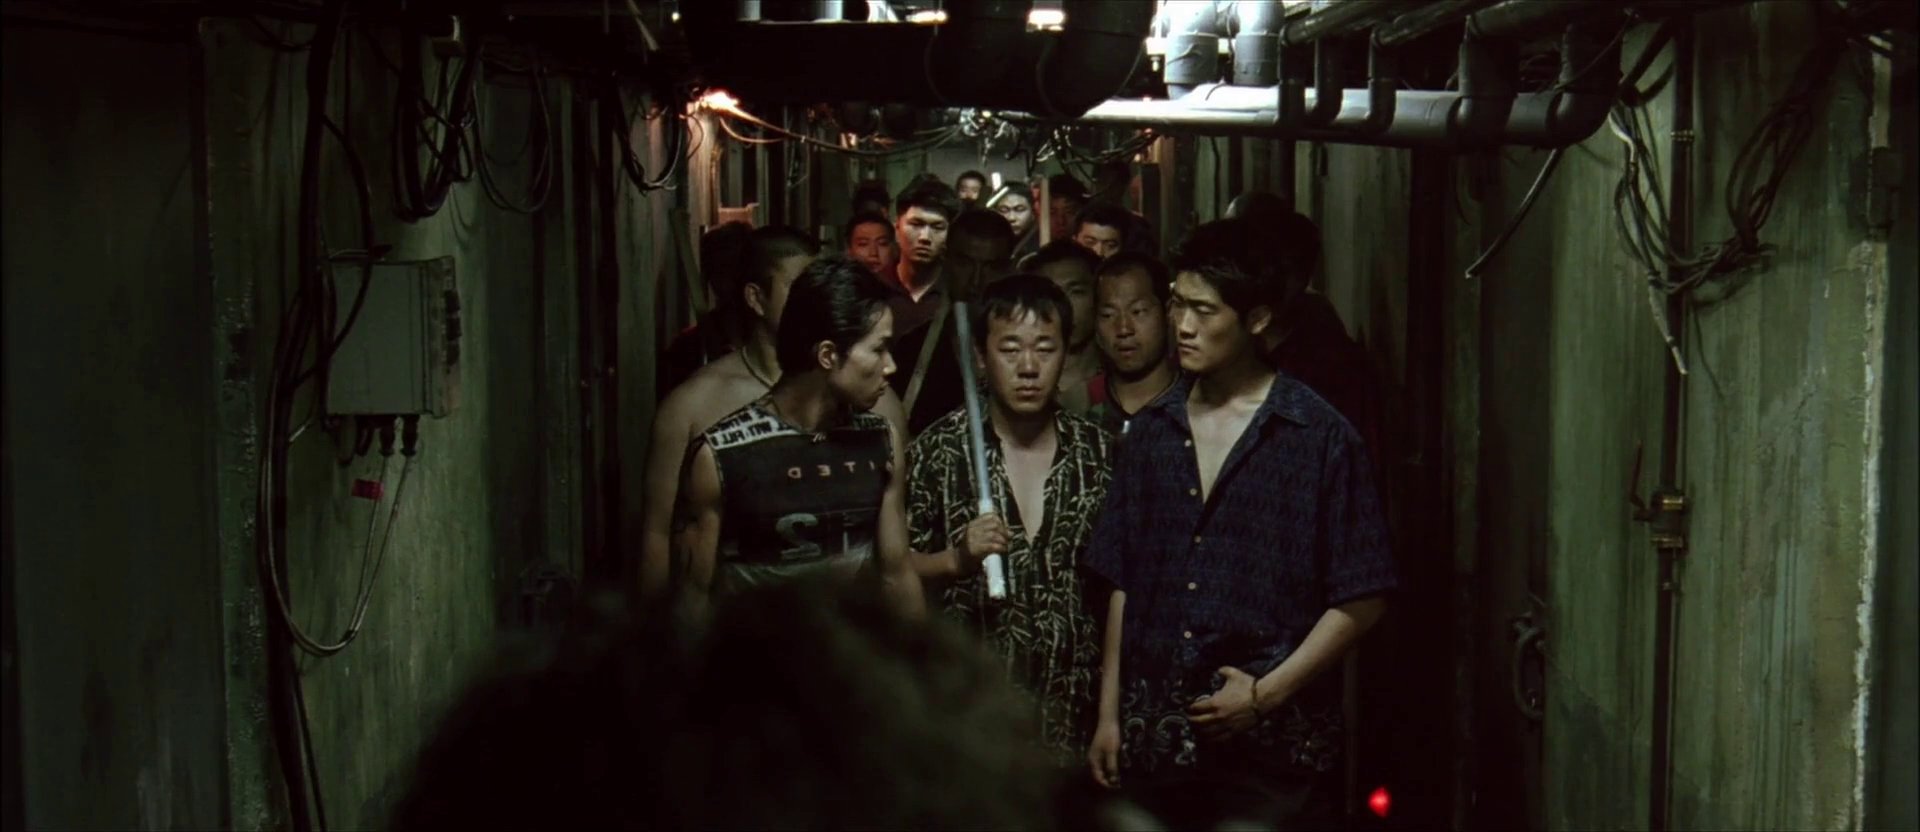

In [ ]:
Image.fromarray(frame,'RGB')

# **# That's your main homework, implement a way to apply the image classification model to look for similar scenes in films.**
## **# A starting point for you to scrape film, and a quick introduction to the messiness of manual scraping media off websites:**
https://www.ubu.com 

In [ ]:
import requests
from bs4 import BeautifulSoup
import urllib.request
import re

In [ ]:
# specify the URL of the archive here
archive_url = "https://ubu.com/film/"

In [ ]:
def get_sites(url):
  sites = []
  html_page = urllib.request.urlopen(url)
  soup = BeautifulSoup(html_page, "html.parser")
  for link in soup.findAll('a'):
    site = link.get('href')
    # the main page is not an artist
    index = re.search("index.html$", site)
    root = re.search("^[.][.]/", site)
    if not index and not root:
      sites.append(site)
  return sites

In [ ]:
def get_video_links(url):
  #create response object
  r = requests.get(url)
  # move up 2 folders in the URL
  url = url[:url.rfind('/')]
  url = url[:url.rfind('/')]
  #create beautiful-soup object
  soup = BeautifulSoup(r.content,'html5lib')
  #find all links on web-page
  links = soup.findAll('a')
  #filter the link ending with .mp4
  video_links = [url + link['href'][2:] for link in links if link['href'].endswith('mp4')]
 
  return video_links

In [ ]:
def download_video_series(video_links, directory):
  # iterate through all links in video_links
  # and download them one by one
  for link in video_links:
    # obtain filename by splitting url and getting last string
    file_name = link.split('/')[-1]
    print ("Downloading file:%s"%file_name)

    try:
      #create response object
      r = requests.get(link, stream = True)

      #download started
      with open(os.path.join(directory, file_name), 'wb') as f:
        for chunk in r.iter_content(chunk_size = 1024*1024):
          if chunk:
            f.write(chunk)

      print ("%s downloaded!\n"%file_name)
    except:
      # ConnectionRefusedError or URLError 
      print("Failed to download file due to an error.")

In [ ]:
artist_sites = get_sites(archive_url + "index.html")
print(artist_sites)

['abidin.html', 'abramovic.html', 'acconci.html', 'acker.html', 'abdoh.html', 'adachi.html', 'adbusters.html', 'ader.html', 'afsah.html', 'agahbanaei.html', 'agee.html', 'ahtila.html', 'ahwesh.html', 'aina.html', 'aitken.html', 'akhmatova.html', 'habib-allah.html', 'alsharif.html', 'almaria.html', 'aleinikov.html', 'alferi.html', 'abu-ali.html', 'alive.html', 'allora.html', 'almond.html', 'althamer.html', 'alys.html', 'amado.html', 'amaouche.html', 'amiralay.html', 'aaf.html', 'amis_don.html', 'amon_duul.html', 'anand.html', 'andersen.html', 'anderson_l.html', 'andriessen.html', 'anger.html', 'angerame.html', 'ant_farm.html', 'antin.html', 'elsken_appel.html', 'araki.html', 'arakawa.html', 'arakawa_shusaku.html', 'arbid.html', 'arcangel.html', 'arledge.html', 'ecart.html', 'arnold.html', 'art-language.html', 'artensemble.html', 'artaud.html', 'avaf.html', 'ashley.html', 'askevold.html', 'assayas.html', 'astore.html', 'atkins.html', 'attar.html', 'attia.html', 'auder.html', 'autant.html

In [ ]:
for artist_site in artist_sites[-2:]:
  print(archive_url + artist_site)
  film_sites = get_sites(archive_url + artist_site)
  for film_site in film_sites:
    #getting all video links
    video_links = get_video_links(archive_url + film_site)

    #download all videos
    download_video_series(video_links, '/content/drive/MyDrive/ScrapedVideos')

# **implement a way to apply the image classification model to look for similar scenes in films.**

In [1]:
%cd video-classification-3d-cnn-pytorch/

[Errno 2] No such file or directory: 'video-classification-3d-cnn-pytorch/'
/content


In [2]:
import json
import os
#from moviepy.editor import *
!pip install imageio-ffmpeg
from moviepy import *
import shutil
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.9 MB 79.4 MB/s 


In [3]:
def loadVideosToInfile(folder):
  videos = os.listdir(folder)
  with open('input', 'w') as inputfile:
    for v in videos:
      if v.split('.')[-1] == 'mp4':
        inputfile.write(v+'\n')

In [12]:
def readAllOutput(outputFolder):
  # create an empty dictionary called 'dictionaries' to which you add the dictionary entries read from the output files
  (dictionaries) = open('/content/drive/MyDrive/output.json')
  # Read all output file names to a variable output_files (a list that contains all file names)
  output_files = os.listdir(dictionaries)
  # Start of the for loop to loop through all files, read them, and add their contents to 'dictionaries'
  for f in output_files:
    # first test if the file extension is a '.json file'
    if f.split('.')[-1] == 'json':
      inputfile.write(v+'\n')
     # Then load the file content to a variable called 'segments' with the json library
      segments = json.load(dictionaries)
     # another for loop, to add the content of segments to dictionaries. As a key use the moviename.  
      for s in segments:
        dictionaries[s['video']] = s
    
  return dictionaries 

In [5]:
# here keyFilmName is the name of the film that you want to find a match for, and the feature dictionary is 
# the dictionary that is given as output by the readAllOutput function

def searchForMatch(keyFilmName, featureDictionary):
    # create variables to keep track of the best clips
    bestRangeStart = 0
    bestRangeFilmName = ''
    bestRangeScore = 1000000000
    
    # first read the features of the keyFilm into keyFeatures
    keyClips = featureDictionary[keyFilmName]['clips']
    keyFeatures = []
    for c in keyClips:
        keyFeatures.append(np.array(c['features']))
    
    # now enter a for loop to go through all films, and see what the best matching sequence is 
    # (we make sure not to check the keyFilm itself by checking it's not that filename)
    for film in featureDictionary.keys():
        if not film == keyFilmName:

            # so now here 'film' is a filename (which is the key in the feature dictionary of that film)
            # first load the features in a 'filmFeatures' list like we did for key Features
          filmClips = featureDictionary[keyFilmName]['clips']
          filmFeatures = []
          for c in filmClips:
          filmFeatures.append(np.array(c['features']))
            # then look at the provided code from the lecture to see how to iterate through the other
            # list of features to find the best segment. 
            # Now just make sure to also register what film name the best matching segment is from. 
            
    # create a list containing the filename, start and nr of clips
    matchingFragment = [bestRangeFilmName, bestRangeStart, len(keyFeatures)]
    
    return matchingFragment

    # First implement it for the best matching one, then expand it to return the n best matching ones as a list,
    # with n as an argument in the function


In [ ]:
def extractFragment(fragment, filmFolder):
  # here adapt the code from the lecture, but make it so that it works for any input fragment list
  # the output of the function above: [bestRangeFilmName, bestRangeStart, len(keyFeatures)]
    
  filmFileName = fragment[0]
  start = fragment[1]
  nrClips = fragment[2]
    
    
  return filmFragment

    # This function should read all .json files in the output folder, and combine them into one large dictionary

In [ ]:
# call function to load the filenames to 'input'
loadVideosToInfile('/content/drive/MyDrive/input_films')

In [ ]:
# run the model to process all films currently in the input_films folder, and save it to a json file, here named by the date
!python main.py --input input --video_root content/drive/MyDrive/VideosToProcess --output /content/drive/MyDrive/R2BTEoutput.json --model /content/drive/MyDrive/models/resnet-34-kinetics-cpu.pth --mode feature --no_cuda

In [ ]:
input_films_processed = os.listdir('/content/drive/MyDrive/input_films')
for file in input_films_processed:
  try:
    shutil.move(os.path.join('/content/drive/MyDrive/input_films',file),'../processed_films')
  except:
    print(file + ' not moved')

In [ ]:
dicts = readAllOutput('/content/drive/MyDrive/output')

In [ ]:
fragment = searchForMatch('film Name here', dicts)

In [ ]:
fragmentFilm = extractFragment(fragment, '../processed_films')

In [ ]:
fragmentFilm.ipython_display()

In [ ]:
fragmentFilm.write_videofile("../output_films/fragment.mp4", audio_codec='aac')